In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
import pickle as pkl

## Importing Data

In [193]:
df = pd.read_csv("../data/troop_movements.csv")
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-09 09:16:19,1,tie_fighter,resistance,5,4,6,9,Chandrila
1,2025-07-09 09:16:18,2,at-st,resistance,3,4,5,7,Socorro
2,2025-07-09 09:16:17,3,resistance_soldier,empire,7,2,3,3,Champala
3,2025-07-09 09:16:16,4,tie_fighter,resistance,5,8,10,3,Dathomir
4,2025-07-09 09:16:15,5,unknown,resistance,7,8,6,10,Tholoth
...,...,...,...,...,...,...,...,...,...
995,2025-07-09 08:59:44,996,at-at,resistance,5,9,9,4,Socorro
996,2025-07-09 08:59:43,997,at-at,resistance,6,7,4,1,Trandosha
997,2025-07-09 08:59:42,998,tie_fighter,empire,8,7,10,4,Ojom
998,2025-07-09 08:59:41,999,tie_fighter,resistance,8,1,8,9,Cerea


## Visualize Data

In [194]:
features = ['homeworld', 'unit_type']

In [195]:
df.groupby('empire_or_resistance').size().reset_index(name='counts')

,empire_or_resistance,counts
0,empire,517
1,resistance,483


In [196]:
df.groupby('homeworld').size().reset_index(name='counts')

,homeworld,counts
0,Alderaan,21
1,Aleen Minor,16
2,Bestine IV,25
3,Cerea,21
4,Champala,25
5,Chandrila,21
6,Concord Dawn,15
7,Corellia,27
8,Dagobah,24
9,Dathomir,21


In [197]:
df.groupby('unit_type').size().reset_index(name='counts')

,unit_type,counts
0,at-at,117
1,at-st,111
2,resistance_soldier,125
3,stormtrooper,128
4,tie_fighter,150
5,tie_silencer,117
6,unknown,147
7,x-wing,105


In [198]:
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-09 09:16:19,1,tie_fighter,resistance,5,4,6,9,Chandrila,True
1,2025-07-09 09:16:18,2,at-st,resistance,3,4,5,7,Socorro,True
2,2025-07-09 09:16:17,3,resistance_soldier,empire,7,2,3,3,Champala,False
3,2025-07-09 09:16:16,4,tie_fighter,resistance,5,8,10,3,Dathomir,True
4,2025-07-09 09:16:15,5,unknown,resistance,7,8,6,10,Tholoth,True
...,...,...,...,...,...,...,...,...,...,...
995,2025-07-09 08:59:44,996,at-at,resistance,5,9,9,4,Socorro,True
996,2025-07-09 08:59:43,997,at-at,resistance,6,7,4,1,Trandosha,True
997,2025-07-09 08:59:42,998,tie_fighter,empire,8,7,10,4,Ojom,False
998,2025-07-09 08:59:41,999,tie_fighter,resistance,8,1,8,9,Cerea,True


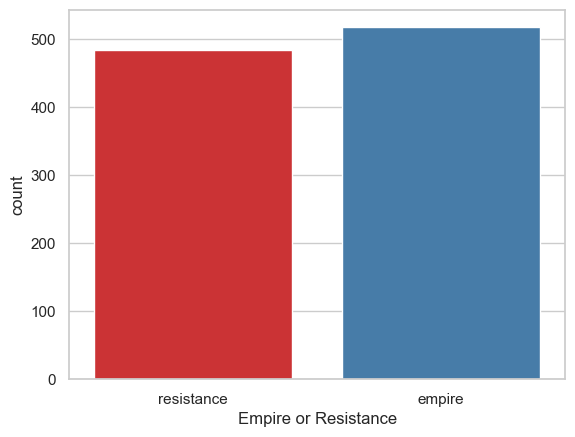

In [199]:
sns.set_theme(style='whitegrid')
sns.countplot(x = 'empire_or_resistance', data=df, palette="Set1", hue='empire_or_resistance', legend=False)
plt.xlabel('Empire or Resistance')
plt.show()

## Creating train and Test Data

In [200]:
X = df[features]
y = df['is_resistance']
X = pd.get_dummies(X)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
X_train

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
29,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
535,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
557,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
270,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
860,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
435,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


## Setting up Decision Tree Classifier

In [225]:
scores = []
for i in range(1, 50):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),          # Step 1: Standardize the data
        ('classifier', DecisionTreeClassifier(max_depth=i))  # Step 3: Fit Decision Tree Classifier
    ])
    pipeline.fit(X_train, y_train)

    # Append the score for the current max_depth
    scores.append((i, pipeline.score(X_test, y_test)))

In [226]:
max(scores, key=lambda x:x[1])

(15, 0.695)

In [229]:
clf = DecisionTreeClassifier(max_depth=15)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Calculate Feature Importance

In [231]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'feature':X_train.columns, 'importance':importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

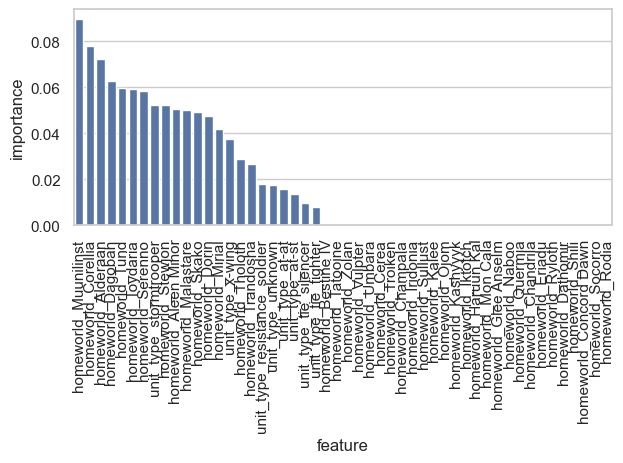

In [232]:
sns.barplot(data=feature_importances, x='feature', y='importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Export Model

In [233]:
output = "../model/clf_decision_tree.pkl"
with open(output, 'wb') as f:
    pkl.dump(clf,f)